In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
productivity_prediction_of_garment_employees = fetch_ucirepo(id=597) 
  
# data (as pandas dataframes) 
X = productivity_prediction_of_garment_employees.data.features 
y = productivity_prediction_of_garment_employees.data.targets 
  
# metadata 
print(productivity_prediction_of_garment_employees.metadata) 
  
# variable information 
print(productivity_prediction_of_garment_employees.variables) 

{'uci_id': 597, 'name': 'Productivity Prediction of Garment Employees', 'repository_url': 'https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees', 'data_url': 'https://archive.ics.uci.edu/static/public/597/data.csv', 'abstract': 'This dataset includes important attributes of the garment manufacturing process and the productivity of the employees which had been collected manually and also been validated by the industry experts.', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 1197, 'num_features': 14, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['actual_productivity'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C51S6D', 'creators': [], 'intro_paper': {'title': 'Mining the productivity data of the garment industry', '

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.concat([X,y], axis =1)

In [4]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


date: date in MM-DD-YYYY

quarter: a portion of the month — month was divided into four quarters

department: associated department with the instance

day: day of the week

team: associated team number with the instance

targeted_productivity: targeted productivity set by the authority for each team for each day

smv: standard minute value — the allocated time for a task

wip: work in progress — includes the number of unfinished items for products

over_time: represents the amount of overtime by each team in minutes

incentive: represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action

idle_time: the duration of time when the production was interrupted due to several reasons

idle_men: the number of workers who were idle due to production interruption

no_of_style_change: number of changes in the style of a particular product

no_of_workers: number of workers on each team

actual_productivity: the actual % of productivity that was delivered by the workers — it ranges from 0 to 1.

## Exploratory Data Analysis (EDA) and Data Visualization

In [5]:
df.shape

(1197, 15)

In [6]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [7]:
df.shape

(1197, 15)

In [8]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


We will examine the work in progress (wip) column later. It appears there are significant differences between their values.

It appears we do not have much idle_time and idle_men in the dataset.

It also seems like the company does a lot of overtime.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [10]:
df['date'] = pd.to_datetime(df['date'])

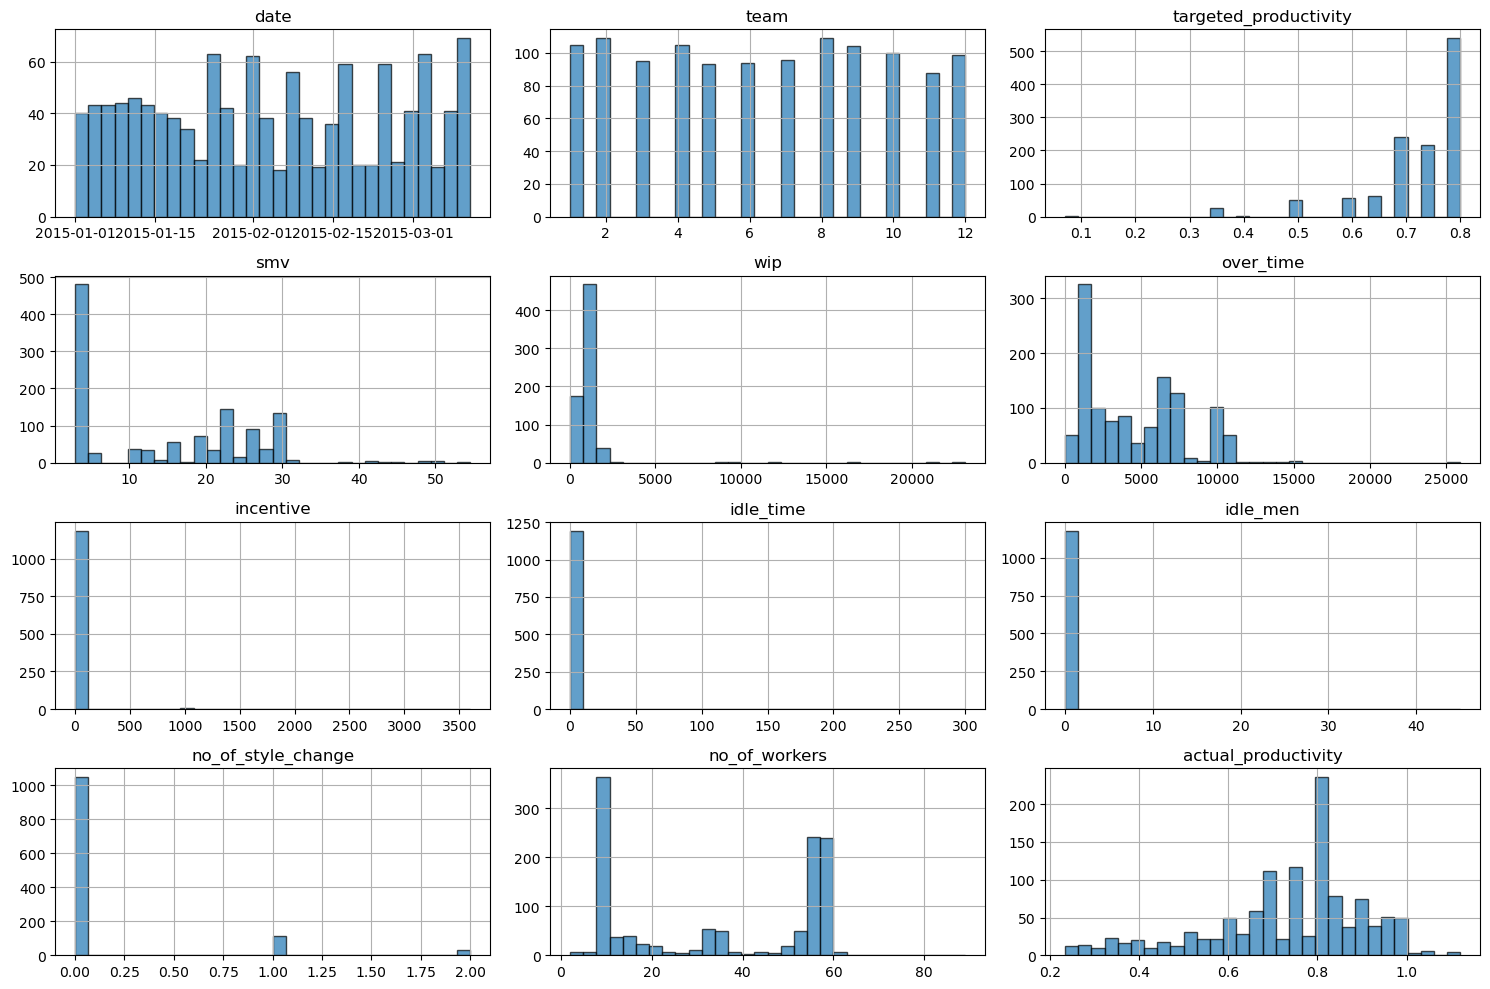

In [11]:
df.hist(figsize=(15, 10), bins=30, edgecolor='k', alpha=0.7)
plt.tight_layout()
plt.show()

# Actual Productivity vs. Targeted Productivity

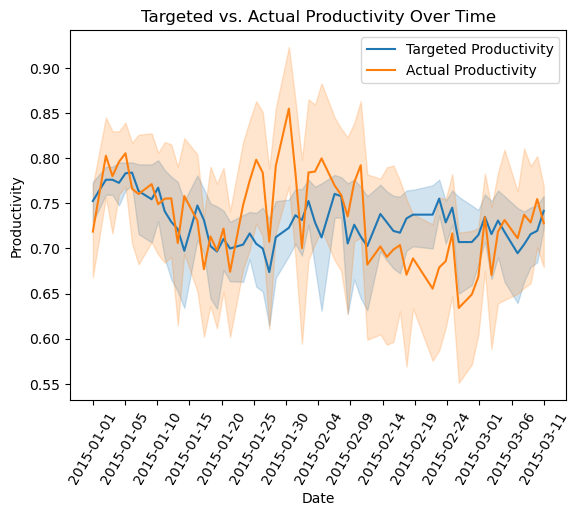

In [12]:
sns.lineplot(data=df, x='date', y='targeted_productivity', label='Targeted Productivity')
sns.lineplot(data=df, x='date', y='actual_productivity', label='Actual Productivity')

plt.title('Targeted vs. Actual Productivity Over Time')
plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.ylabel('Productivity')
start_date = df['date'].min()
end_date = df['date'].max()
date_ticks = pd.date_range(start=start_date, end=end_date, periods=15)
plt.xticks(date_ticks, rotation=60)
plt.legend()
plt.show()

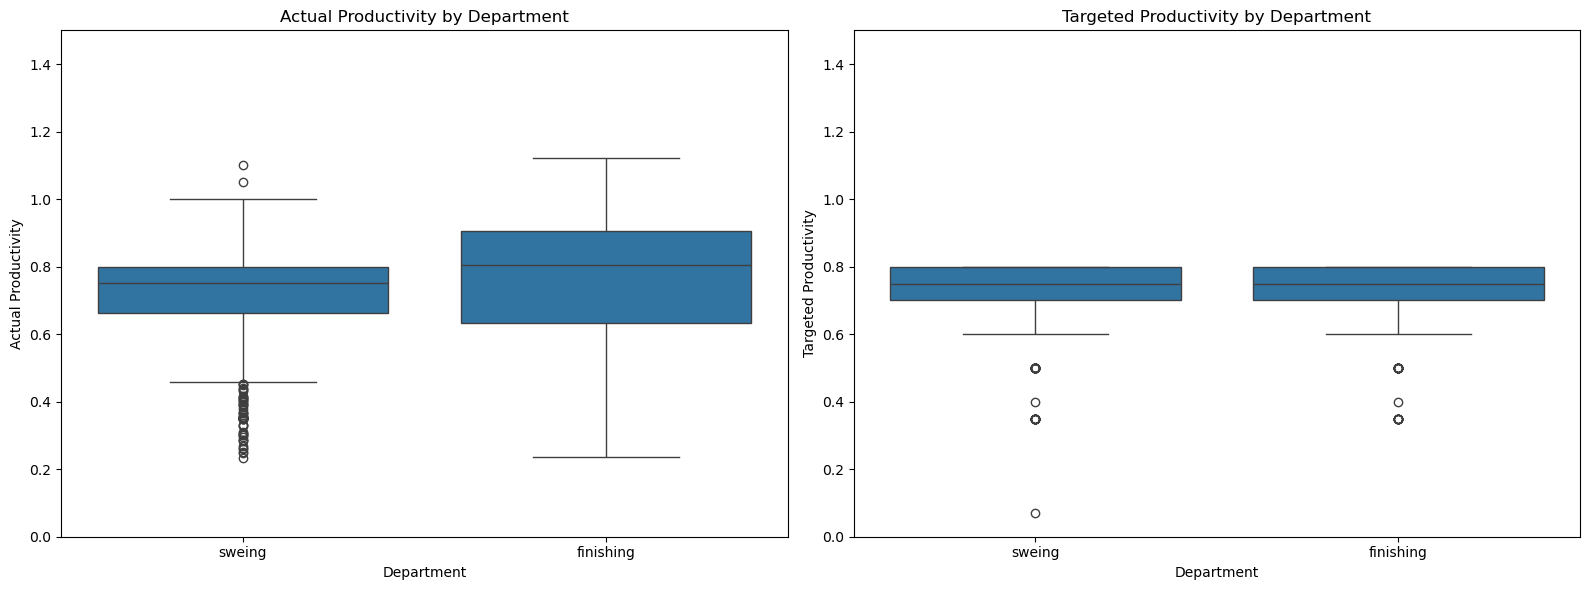

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(x='department', y='actual_productivity', data=df, ax=ax1)
ax1.set_title('Actual Productivity by Department')
ax1.set_xlabel('Department')
ax1.set_ylabel('Actual Productivity')
ax1.set_ylim(0, 1.5)

sns.boxplot(x='department', y='targeted_productivity', data=df, ax=ax2)
ax2.set_title('Targeted Productivity by Department')
ax2.set_xlabel('Department')
ax2.set_ylabel('Targeted Productivity')
ax2.set_ylim(0, 1.5)

plt.tight_layout()
plt.show()

In [14]:
df.groupby('department')['actual_productivity'].describe()

,count,mean,std,min,25%,50%,75%,max
department,,,,,,,,
finishing,506.0,0.752951,0.197021,0.235795,0.631606,0.805909,0.906364,1.120437
sweing,691.0,0.722013,0.154784,0.233705,0.661470,0.750608,0.800402,1.100484


In [15]:
df.groupby('department')['targeted_productivity'].describe()

,count,mean,std,min,25%,50%,75%,max
department,,,,,,,,
finishing,506.0,0.737352,0.091512,0.35,0.7,0.75,0.8,0.8
sweing,691.0,0.723980,0.102006,0.07,0.7,0.75,0.8,0.8


# Over_time 

In [16]:
df[df["over_time"] == 0]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
684,2015-02-09,Quarter2,sweing,Monday,11,0.75,10.05,103.0,0,45,0.0,0,0,54.0,0.750648
694,2015-02-10,Quarter2,sweing,Tuesday,10,0.80,22.52,1268.0,0,88,0.0,0,0,56.0,0.900632
695,2015-02-10,Quarter2,sweing,Tuesday,1,0.80,22.52,1546.0,0,88,0.0,0,0,57.0,0.900471
696,2015-02-10,Quarter2,sweing,Tuesday,3,0.80,22.52,813.0,0,88,0.0,0,0,57.0,0.900471
697,2015-02-10,Quarter2,sweing,Tuesday,2,0.80,22.52,1512.0,0,88,0.0,0,0,57.0,0.899984
713,2015-02-11,Quarter2,sweing,Wednesday,2,0.80,22.52,1557.0,0,90,0.0,0,0,57.5,1.000345
714,2015-02-11,Quarter2,sweing,Wednesday,1,0.80,22.52,1498.0,0,113,0.0,0,0,57.0,1.000066
718,2015-02-11,Quarter2,sweing,Wednesday,10,0.80,22.52,598.0,0,75,0.0,0,0,56.0,0.850365
730,2015-02-12,Quarter2,sweing,Thursday,1,0.80,22.52,1397.0,0,138,0.0,0,0,57.0,1.100484
732,2015-02-12,Quarter2,sweing,Thursday,2,0.80,22.52,1327.0,0,113,0.0,0,0,57.5,1.000345


In [17]:
len(df[df['over_time'] == 0])

31

In [18]:
len(df[df['over_time'] > 0])

1166

It seems the company mostly works overtime.

# Idle_men and Idle_time

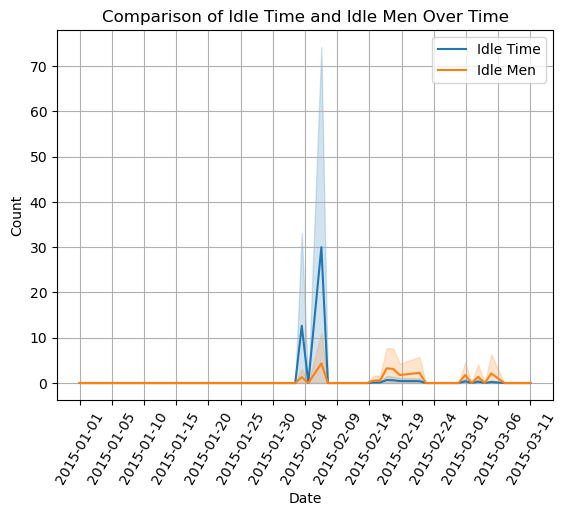

In [19]:
sns.lineplot(data=df, x='date', y='idle_time', label='Idle Time')
sns.lineplot(data=df, x='date', y='idle_men', label='Idle Men')

plt.title('Comparison of Idle Time and Idle Men Over Time')
plt.xlabel('Date')
plt.xticks(rotation = 60)
plt.ylabel('Count')
start_date = df['date'].min()
end_date = df['date'].max()
date_ticks = pd.date_range(start=start_date, end=end_date, periods=15)
plt.xticks(date_ticks, rotation=60)

plt.legend()

plt.grid(True)
plt.show()

It appears that idle_time and idle_men coincide in the same period, which was expected.

In [20]:
len(df[df['idle_time'] > 0])

18

The company does not have a lot of idle time. Idle time won't be a problem for productivity in this period.

In [21]:
df['idle_men'].sum()

442

# Day Column

In [23]:
df['day'].value_counts()

day
Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: count, dtype: int64

It seems like there is no information on Friday; maybe the company is closed on Fridays.

In [24]:
df.groupby('day')['actual_productivity'].mean()

day
Monday       0.735488
Saturday     0.751929
Sunday       0.728604
Thursday     0.722641
Tuesday      0.742701
Wednesday    0.730462
Name: actual_productivity, dtype: float64

The daily mean of actual productivity is similar across different days.

# Incentive

In [25]:
df['incentive'].value_counts()

incentive
0       604
50      113
63       61
45       54
30       52
23       38
38       29
60       28
40       27
75       24
113      21
88       19
34       17
56       14
26        9
100       7
55        7
81        7
69        6
65        6
70        6
35        5
960       5
94        4
44        4
90        3
24        2
27        2
49        2
119       2
46        2
1080      1
1440      1
2880      1
3600      1
32        1
1200      1
62        1
98        1
33        1
138       1
93        1
53        1
29        1
21        1
37        1
54        1
25        1
Name: count, dtype: int64

In [26]:
incentive_ = df[df['incentive'] > 0]

In [27]:
incentive_['incentive'].min()

21

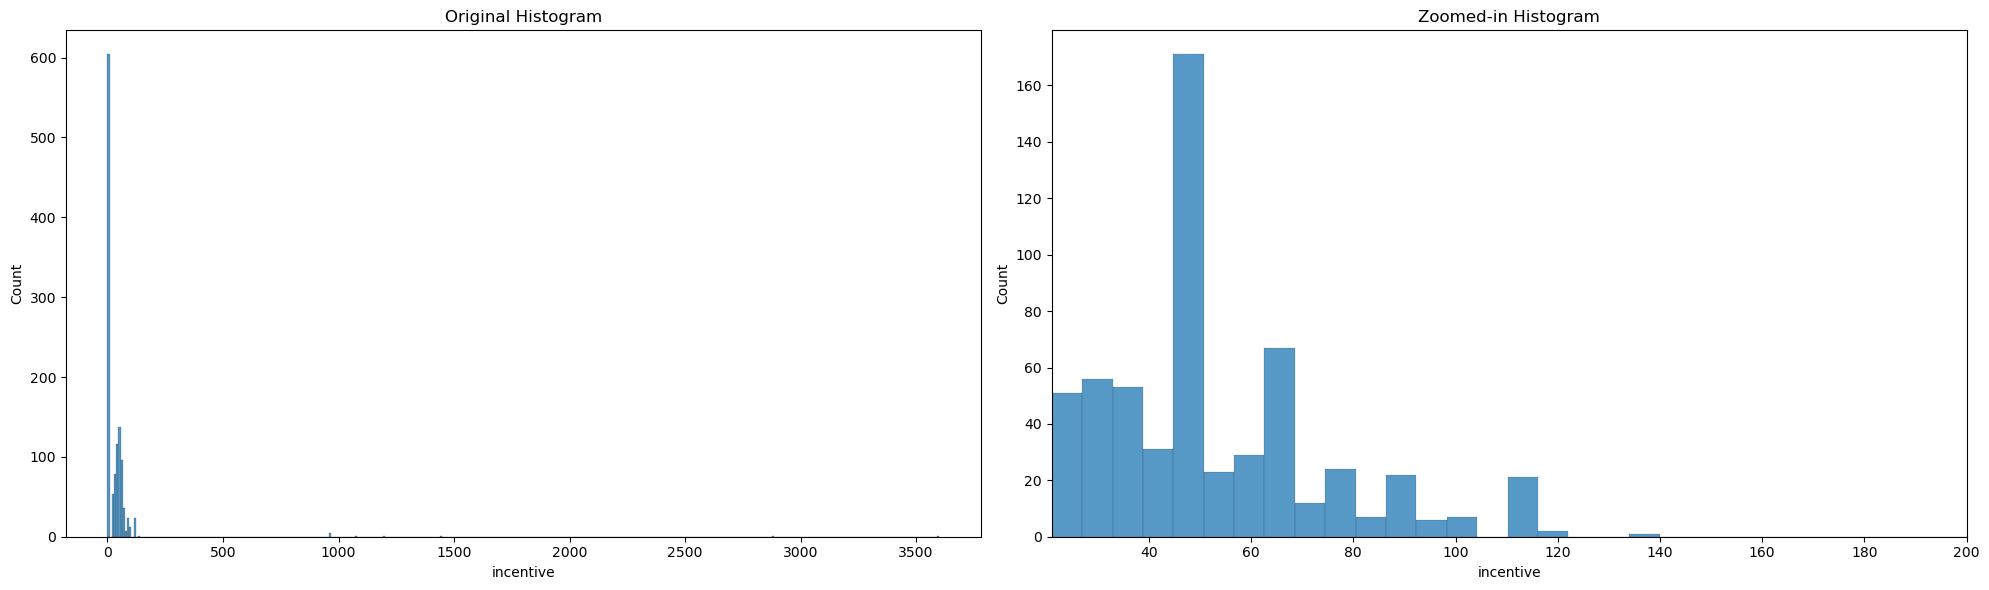

In [29]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20, 6))

sns.histplot(x='incentive', data=df, ax=ax1)
ax1.set_title('Original Histogram')

sns.histplot(x='incentive', data=incentive_, ax=ax2)
ax2.set_title('Zoomed-in Histogram')
ax2.set_xlim([21, 200])


plt.tight_layout()
plt.show()

In [30]:
(df['incentive'] == 0).sum()

604

In [31]:
(df['incentive'] > 0).sum()

593

In [32]:
(df['incentive'] > 200).sum()

10

In [33]:
df['incentive'].describe()

count    1197.000000
mean       38.210526
std       160.182643
min         0.000000
25%         0.000000
50%         0.000000
75%        50.000000
max      3600.000000
Name: incentive, dtype: float64

More than half of the values in the 'incentive' column are 0.

There are only 10 entries with an incentive value greater than 200.

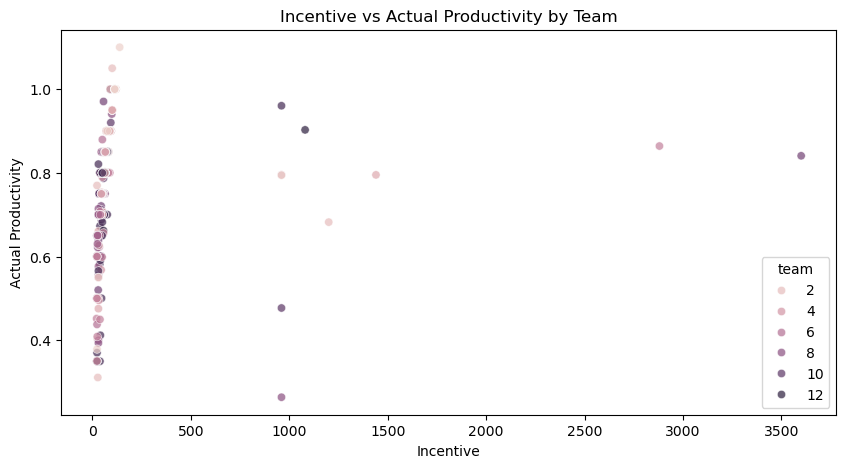

In [34]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='incentive', y='actual_productivity', hue='team', data=incentive_, alpha=0.7)

plt.title('Incentive vs Actual Productivity by Team')
plt.xlabel('Incentive')
plt.ylabel('Actual Productivity')
plt.show()

# Team

In [35]:
df['team'].value_counts().sort_index()

team
1     105
2     109
3      95
4     105
5      93
6      94
7      96
8     109
9     104
10    100
11     88
12     99
Name: count, dtype: int64

In [36]:
team = df.groupby('team')['department'].value_counts()
team

team  department
1     sweing        56
      finishing     49
2     sweing        57
      finishing     52
3     sweing        58
      finishing     37
4     sweing        59
      finishing     46
5     sweing        58
      finishing     35
6     sweing        59
      finishing     35
7     sweing        55
      finishing     41
8     sweing        56
      finishing     53
9     sweing        58
      finishing     46
10    sweing        57
      finishing     43
11    sweing        59
      finishing     29
12    sweing        59
      finishing     40
Name: count, dtype: int64

In [37]:
team_productivity = df.groupby('team')['actual_productivity'].sum()
team_productivity

team
1     86.210710
2     84.023209
3     76.368583
4     80.853657
5     64.912214
6     64.426212
7     64.128529
8     73.482144
9     76.384039
10    71.973620
11    60.014642
12    77.126485
Name: actual_productivity, dtype: float64

In [38]:
team_dept_incentives = df.groupby(['team', 'department'])['incentive'].sum().reset_index()
team_dept_incentives

,team,department,incentive
0,1,finishing,960
1,1,sweing,3933
2,2,finishing,1200
3,2,sweing,2965
4,3,finishing,1440
5,3,sweing,3268
6,4,finishing,960
7,4,sweing,2720
8,5,finishing,2880
9,5,sweing,1690


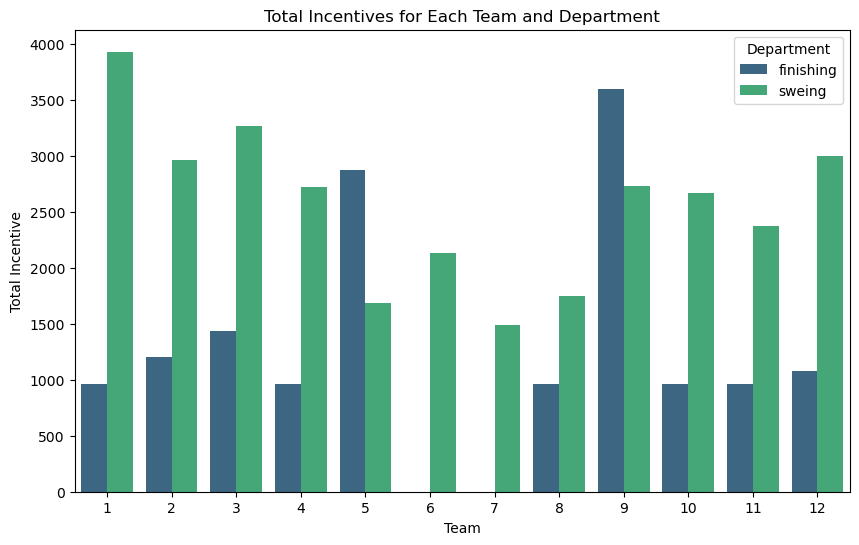

In [40]:
plt.figure(figsize=(10,6))

sns.barplot(x='team', y='incentive', hue='department', data=team_dept_incentives, palette='viridis')
plt.xlabel('Team')
plt.ylabel('Total Incentive')
plt.title('Total Incentives for Each Team and Department')
plt.legend(title='Department')

plt.show()

# Quarter

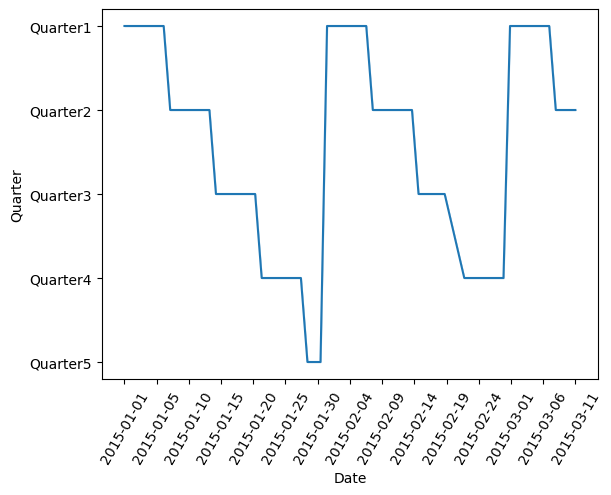

In [41]:
plt.figure(figure=(6,4))
sns.lineplot(data=df, x='date', y='quarter')

plt.xlabel('Date')
plt.xticks(rotation = 60)
plt.ylabel('Quarter')
start_date = df['date'].min()
end_date = df['date'].max()
date_ticks = pd.date_range(start=start_date, end=end_date, periods=15)
plt.xticks(date_ticks, rotation=60)
plt.show()

looks like there is a pattern

In [42]:
df['quarter'].value_counts()

quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64

In [43]:
print(df['date'].min())
print(df['date'].max())

2015-01-01 00:00:00
2015-03-11 00:00:00


In [44]:
df[df['date'].dt.month == 2]['date'].max()

Timestamp('2015-02-28 00:00:00')

In [45]:
df.groupby('quarter')['date'].agg(['min', 'max'])

,min,max
quarter,,
Quarter1,2015-01-01,2015-03-07
Quarter2,2015-01-08,2015-03-11
Quarter3,2015-01-15,2015-02-19
Quarter4,2015-01-22,2015-02-28
Quarter5,2015-01-29,2015-01-31


In [46]:
df[df['quarter'] == 'Quarter5']

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
498,2015-01-29,Quarter5,sweing,Thursday,2,0.80,22.52,1416.0,6840,113,0.0,0,0,57.0,1.000230
499,2015-01-29,Quarter5,finishing,Thursday,4,0.80,4.30,NaN,1200,0,0.0,0,0,10.0,0.989000
500,2015-01-29,Quarter5,sweing,Thursday,3,0.80,22.52,1287.0,6840,100,0.0,0,0,57.0,0.950186
501,2015-01-29,Quarter5,sweing,Thursday,4,0.80,22.52,1444.0,6900,88,0.0,0,0,57.5,0.900800
502,2015-01-29,Quarter5,sweing,Thursday,10,0.80,22.52,1088.0,6720,88,0.0,0,0,56.0,0.900130
503,2015-01-29,Quarter5,finishing,Thursday,6,0.50,2.90,NaN,1200,0,0.0,0,0,10.0,0.899000
504,2015-01-29,Quarter5,finishing,Thursday,8,0.65,4.15,NaN,960,0,0.0,0,0,8.0,0.877552
505,2015-01-29,Quarter5,finishing,Thursday,11,0.60,2.90,NaN,960,0,0.0,0,0,8.0,0.864583
506,2015-01-29,Quarter5,finishing,Thursday,10,0.80,3.94,NaN,1200,0,0.0,0,0,10.0,0.856950
507,2015-01-29,Quarter5,finishing,Thursday,1,0.75,3.94,NaN,1200,0,0.0,0,0,10.0,0.853667


When we look at the quarter column, we see months divided into 4 quarters. However, after the 4th quarter in January, the 29th, 

30th, and 31st days of the month are called 'quarter 5'. In February, the last day of the month is the 28th, so there is no need 

for quarter 5. We only have data for March for 11 days, so there is no need for quarters 3, 4, or 5 in March.

In [47]:
df.groupby(['quarter'])['actual_productivity'].mean()

quarter
Quarter1    0.751560
Quarter2    0.743710
Quarter3    0.704759
Quarter4    0.709067
Quarter5    0.826177
Name: actual_productivity, dtype: float64

# Number of workers

In [51]:
df.groupby('team')['no_of_workers'].mean()

team
1     35.042857
2     34.623853
3     39.521053
4     38.200000
5     39.381720
6     25.170213
7     37.098958
8     33.490826
9     35.211538
10    35.295000
11    38.738636
12    23.919192
Name: no_of_workers, dtype: float64

In [53]:
df['team'].value_counts().sort_index()

team
1     105
2     109
3      95
4     105
5      93
6      94
7      96
8     109
9     104
10    100
11     88
12     99
Name: count, dtype: int64

# Number of the changes in the style

In [54]:
df['no_of_style_change'].value_counts()

no_of_style_change
0    1050
1     114
2      33
Name: count, dtype: int64

In [55]:
df.groupby('no_of_style_change')['actual_productivity'].mean()

no_of_style_change
0    0.750425
1    0.615035
2    0.661932
Name: actual_productivity, dtype: float64

# Work in progress(wip)

We know the wip(work in progress) column has null values. Below, we inspect the 'wip' column for null values and check if there are any 'idle_men' or 'idle_time' entries when 'wip' is null.

In [56]:
df[df['wip'] == 0]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity


In [57]:
df['wip'].isnull().sum()

506

In [58]:
df[df['wip'].isnull()]['idle_time'].value_counts()

idle_time
0.0    506
Name: count, dtype: int64

In [59]:
df[df['wip'].isnull()]['idle_men'].value_counts()

idle_men
0    506
Name: count, dtype: int64

In [60]:
df[df['wip'].isnull()]['department'].value_counts()

department
finishing    506
Name: count, dtype: int64

# Correlation Matrix

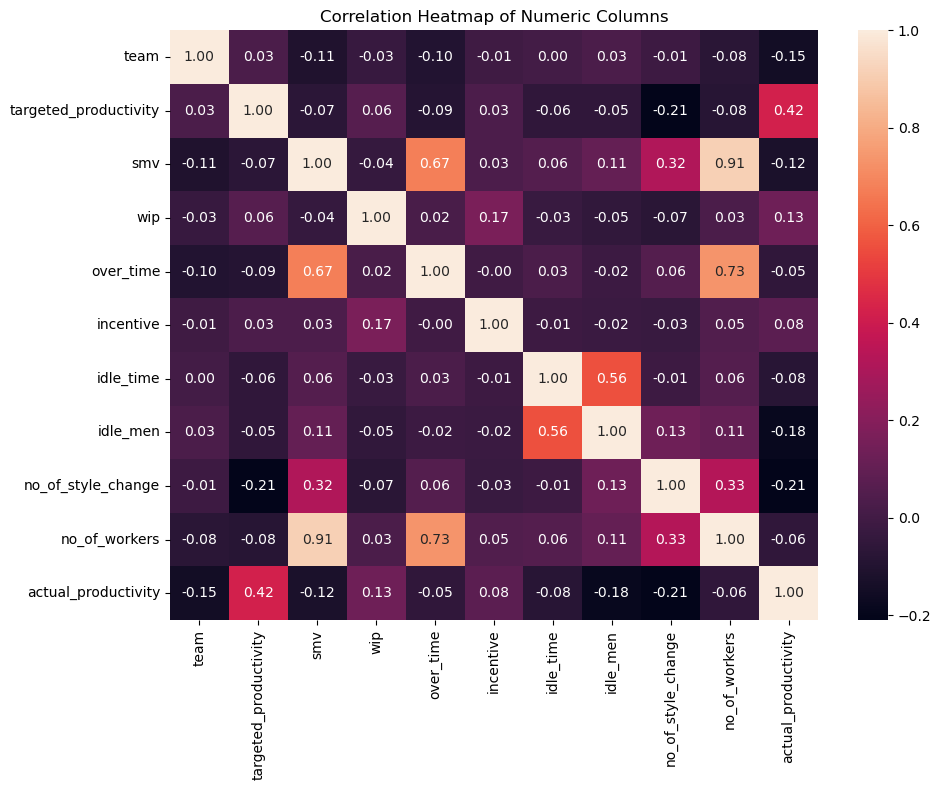

In [62]:
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Create the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.title('Correlation Heatmap of Numeric Columns')
plt.tight_layout()
plt.show()

# Data Cleaning and Data Preparation

In [63]:
df = df.drop('wip', axis = 1)

We are seeing that all the empty columns in the 'wip' column belong to the finishing department. We can assume there are no items to finish and fill these NA values with 0. However, since there are also no 'idle_time' and 'idle_men' values when 'wip' is empty, it seems contradictory to keep these rows. Therefore, I have decided to delete the 'wip' column.

In [64]:
df = df.drop(['idle_time','idle_men'], axis =1)

Since we can’t get much information from the 'idle_time' and 'idle_men' columns, I have decided to delete them.

In [65]:
df = df.drop('no_of_style_change', axis = 1)

Since there isn't much style change due to this, I decided to delete the 'idle_time' column.

In [66]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,7080,98,59.0,0.940725
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,8.0,0.886500
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,3660,50,30.5,0.800570
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,3660,50,30.5,0.800570
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1920,50,56.0,0.800382


In [67]:
df['no_of_workers'] = df['no_of_workers'].astype('int')

In [68]:
df.loc[df['quarter'] == 'Quarter5', 'quarter'] = 'Quarter4'
df['quarter'].value_counts()

quarter
Quarter1    360
Quarter2    335
Quarter4    292
Quarter3    210
Name: count, dtype: int64

In [69]:
df.groupby('quarter')['actual_productivity'].mean()

quarter
Quarter1    0.751560
Quarter2    0.743710
Quarter3    0.704759
Quarter4    0.726714
Name: actual_productivity, dtype: float64

In [70]:
def dummies(df, columns):
    return pd.get_dummies(df, columns=columns, prefix=columns)

df = dummies(df, ['quarter', 'department', 'day', 'team'])

In [71]:
df.head()

,date,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12
0,2015-01-01,0.80,26.16,7080,98,59,0.940725,True,False,False,...,False,False,False,False,False,True,False,False,False,False
1,2015-01-01,0.75,3.94,960,0,8,0.886500,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2015-01-01,0.80,11.41,3660,50,30,0.800570,True,False,False,...,False,False,False,False,False,False,False,False,True,False
3,2015-01-01,0.80,11.41,3660,50,30,0.800570,True,False,False,...,False,False,False,False,False,False,False,False,False,True
4,2015-01-01,0.80,25.90,1920,50,56,0.800382,True,False,False,...,False,False,False,True,False,False,False,False,False,False


In [72]:
df.columns

Index(['date', 'targeted_productivity', 'smv', 'over_time', 'incentive',
       'no_of_workers', 'actual_productivity', 'quarter_Quarter1',
       'quarter_Quarter2', 'quarter_Quarter3', 'quarter_Quarter4',
       'department_finishing', 'department_sweing', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday', 'team_1', 'team_2', 'team_3', 'team_4', 'team_5',
       'team_6', 'team_7', 'team_8', 'team_9', 'team_10', 'team_11',
       'team_12'],
      dtype='object')

In [73]:
df['actual_productivity'] = df['actual_productivity'].round(2)

In [74]:
df = df.drop('date', axis =1)

In [75]:
df.head()

,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12
0,0.80,26.16,7080,98,59,0.94,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0.75,3.94,960,0,8,0.89,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.80,11.41,3660,50,30,0.80,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,0.80,11.41,3660,50,30,0.80,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,0.80,25.90,1920,50,56,0.80,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False


# DecisionTreeRegressor

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [77]:
X = df.drop('actual_productivity', axis=1)
y = df['actual_productivity']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [85]:
y_pred = tree_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

Mean Squared Error: 0.01571875
Root Mean Squared Error: 0.12537443918119834
R2 Score: 0.4068916905879594


Our R2 score of 0.407 suggests that our model explains about 40.7% of the variability in the target variable.

It is not an extremely strong score but it is something.

# Let's try GridSearch

In [86]:
param_grid = {
    'max_depth': [None, 5, 7, 10, 15, 20],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

Best parameters: {'max_depth': 7, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 20}


In [87]:
tree_optimized = DecisionTreeRegressor(**best_params)
tree_optimized.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=5, min_samples_split=20)

In [89]:
y_pred_optimized = tree_optimized.predict(X_test)
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
print(f'Optimized Mean Squared Error: {mse_optimized}')

rmse = np.sqrt(mean_squared_error(y_test, y_pred_optimized))
print(f'Root Mean Squared Error: {rmse}')

r2 = r2_score(y_test, y_pred_optimized)
print(f'R2 Score: {r2}')

Optimized Mean Squared Error: 0.01536109817388048
Root Mean Squared Error: 0.12393989742564934
R2 Score: 0.42038680120094574


The current R² is higher than the previous R² score. There is improvement in the model's performance. 